In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("../csv/notas.csv")
df.columns = df.columns.str.strip()

In [11]:
# 2. Selecionar as colunas de interesse e renomeá-las
# É importante que os nomes das colunas 'AP1 (10,0)' e 'AP2 (10,0)'
# correspondam exatamente aos nomes no seu arquivo CSV.
df_notas = df[['AP1 (10,0)', 'AP2 (10,0)']].copy()
df_notas = df_notas.rename(columns={
    'AP1 (10,0)': 'TP1',
    'AP2 (10,0)': 'TP2'
})

# Converter valores de string (com vírgula) para float (com ponto)
# Substituir vírgula por ponto e converter para numérico
for col in df_notas.columns:
    df_notas[col] = df_notas[col].astype(str).str.replace(',', '.').astype(float)

# Agora, df_notas_selecionadas conterá apenas as colunas 'TP1' e 'TP2'
# com os dados das colunas originais.
print(df_notas.head())
print(f"\nTipos de dados: {df_notas.dtypes}")
print(f"Valores mínimos: {df_notas.min()}")
print(f"Valores máximos: {df_notas.max()}")

   TP1  TP2
0  7.6  8.3
1  7.8  7.9
2  9.5  9.0
3  8.8  8.5
4  7.6  9.6

Tipos de dados: TP1    float64
TP2    float64
dtype: object
Valores mínimos: TP1    0.0
TP2    0.0
dtype: float64
Valores máximos: TP1    10.0
TP2     9.6
dtype: float64


C:\Users\shiro\AppData\Local\Temp\ipykernel_8348\810774166.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


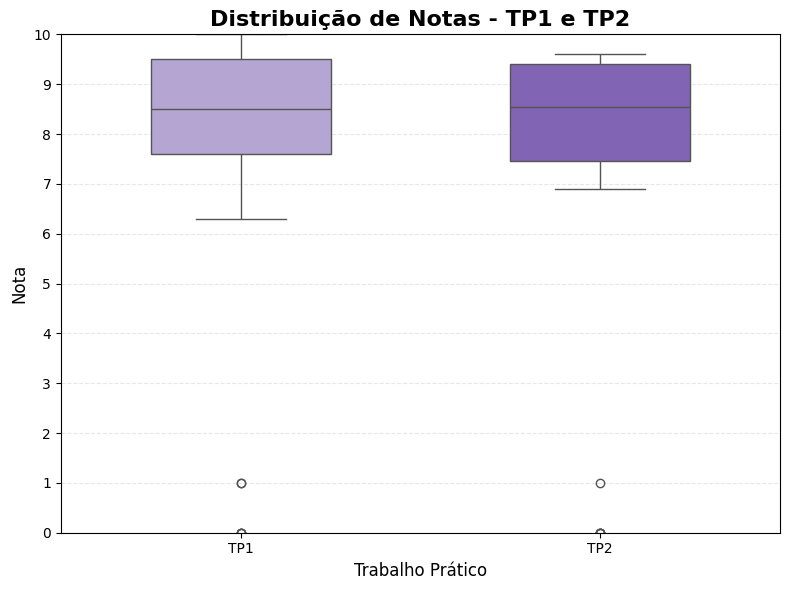

In [13]:
df_long = df_notas[['TP1', 'TP2']].melt(var_name='Avaliação', value_name='Nota')

plt.figure(figsize=(8, 6))
# Definir ordem explícita das avaliações para garantir ordem "TP1", "TP2"
sns.boxplot(
    x='Avaliação',
    y='Nota',
    data=df_long,
    palette=['#b39ddb', '#7e57c2'],
    order=['TP1', 'TP2'],
    width=0.5
)

plt.title('Distribuição de Notas - TP1 e TP2', fontsize=16, fontweight='bold')
plt.ylabel('Nota', fontsize=12)
plt.xlabel('Trabalho Prático', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3, axis='y')
plt.ylim(0, 10)
plt.yticks(range(0, 11, 1))  # Garantir ticks de 0 a 10 em intervalos de 1

plt.tight_layout()
plt.show()
